## This notebook will show the major features of the data set and will explore two questions relating to the data

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats

In [2]:
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


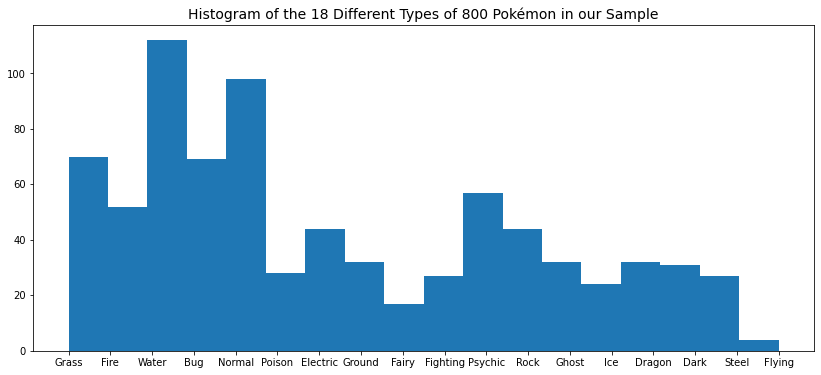

In [3]:
poke_type = data['Type 1']
plt.figure(figsize = [14,6])
plt.hist(poke_type, bins = 18)
plt.title('Histogram of the 18 Different Types of 800 Pokémon in our Sample', fontsize = 14)
plt.savefig('Poke_hist.png')

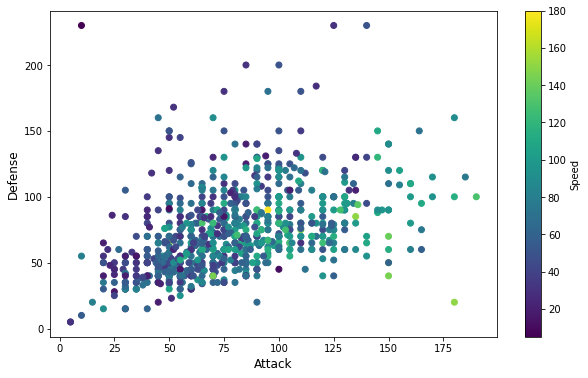

In [4]:
attack = data['Attack']
defense = data['Defense']
speed = data['Speed']
plt.figure(figsize = [10,6])
plt.scatter(attack, defense, c = speed, cmap = 'viridis')
plt.colorbar(label = 'Speed')
plt.xlabel('Attack', fontsize = 12)
plt.ylabel('Defense', fontsize = 12)
plt.savefig('atk_vs_def_vs_speed.png')

### Let's explore the feature space of Fire types and Water types

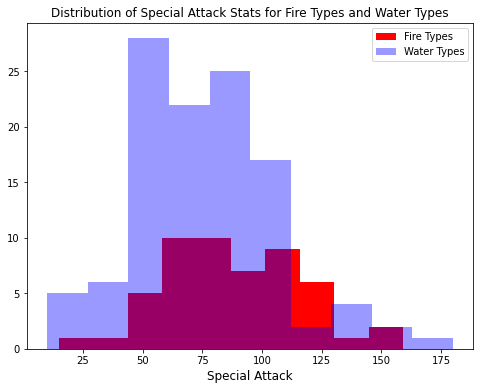

In [5]:
fire_ix = np.where(poke_type == 'Fire')[0]
water_ix = np.where(poke_type == 'Water')[0]

sp_attack = data['Sp. Atk']

plt.figure(figsize = [8,6])
plt.hist(sp_attack[fire_ix],color = 'r', label = 'Fire Types')
plt.hist(sp_attack[water_ix],color = 'b', alpha = 0.4, label = 'Water Types')
plt.legend()
plt.title('Distribution of Special Attack Stats for Fire Types and Water Types', fontsize = 12)
plt.xlabel('Special Attack', fontsize = 12)
plt.savefig('water_fire_sp_atk_hist.png')

#### Hypothesis Test:
Consider the histograms plotted above to be a large sample from the population of Water types and Fire types. Can we say with 95% confidence that Fire types typically have a higher special attack?

Let $\mu_{atk,fire} $ be the mean special attack stat of the population of Fire pokémon, and let $\mu_{atk,water}$ be the mean special attack stat of the population of Water pokémon.

$H_{0}$ : Fire types do not have a higher special attack that Water types. $\rightarrow \mu_{atk,fire} = \mu_{atk,water}$

$H_{a}$ : Fire types $\textit{do}$ have a higher special attack than Water types. $\rightarrow \mu_{atk,fire} > \mu_{atk,water}$

Compute $\bar{x}_{sp.atk,fire}$ , $\bar{x}_{sp.atk,water}$ , $s_{sp.atk,fire}$ , and  $s_{sp.atk,water}$ :

In [32]:
def compute_stats(element, stat):
    '''
    Computes mean and standard deviation of a particular physical stat (attack, defense, speed, etc.)
    for a given element/Pokémon type (fire, water, electric, etc.).
    Both arguments should be strings.
    '''
    ix = np.where(data['Type 1'] == element)[0]
    n = len(ix)
    attribute = data[stat]
    xbar = np.sum(attribute[ix]) / len(ix)
    s = np.sqrt( (1/len(ix)) * np.sum( (attribute[ix]-xbar)**2) )
    
    return xbar, s, n

In [33]:
xbar_sp_atk_fire, s_sp_atk_fire, _ = compute_stats('Fire', 'Sp. Atk')
xbar_sp_atk_water, s_sp_atk_water, _ = compute_stats('Water', 'Sp. Atk')

if xbar_sp_atk_fire > xbar_sp_atk_water:
    print(True)

True


Now use the t-test statistic to compute a confidence interval for the mean of each sample.

Confidence interval for $\mu$ : $$\bar{x} \pm t^{*} \frac{s}{\sqrt{n}}$$

In [34]:
# use sp.stats.t.sf(t*, df) to get the p-value

In [35]:
def compute_CI(element, stat):
    '''
    Compute the confidence interval at a given confidence threshold for a given element and stat.
    '''
    xbar, s, n = compute_stats(element, stat)
    df = n - 1 
    tstar = sp.stats.t.ppf(0.05,df)
    upper = xbar + (np.abs(tstar) * s / (n**(1/2)))
    lower = xbar - (np.abs(tstar) * s / (n**(1/2)))
    return lower, upper

In [36]:
ci_fire = compute_CI('Fire', 'Sp. Atk') 
ci_water = compute_CI('Water', 'Sp. Atk')

print(f'\t\tFire CI \t\t\t\t Water CI \n{ci_fire} \t{ci_water}')

		Fire CI 				 Water CI 
(82.0688123134973, 95.89272614804115) 	(70.28290324660374, 79.34209675339626)


The 95% confidence intervals do not overlap at all! The entire confidence interval for Fire types is higher than that of Water types. Now for the actual hypothesis test. If the sample standard deviations are sufficiently close, then we can make the assumption that $\sigma_{sp.atk,water} = \sigma_{sp.atk,fire}$ and use the pooled estimate:

$$
s_{p} = \sqrt{ \frac{ (n_{1}-1)s_{1}^{2} + (n_{2}-1)s_{2}^{2} }{n_{1} + n_{2} -2 } }
$$

The test statistic will be:

$$
t = \frac{ \bar{x}_{1} - \bar{x}_{2}}{s_{p}\sqrt{ \frac{1}{n_{1}} +  \frac{1}{n_{2}}}}
$$

Now, compute these quantities and state the conclusion:

In [45]:
def compute_sp(element1, element2, stat):
    xbar1, s1, n1 = compute_stats(element1, stat)
    xbar2, s2, n2 = compute_stats(element2, stat)
    s_p = np.sqrt( ((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return s_p

def obtain_hypothesis_test_values(element1,element2, stat):
    xbar1, s1, n1 = compute_stats(element1, stat)
    xbar2, s2, n2 = compute_stats(element2, stat)
    s_p = compute_sp(element1,element2,stat)
    t = (xbar1 - xbar2)/(s_p*np.sqrt(n1**-1 + n2**-1))
    df = n1 + n2 - 2
    tstar = sp.stats.t.ppf(0.025,df)
    return t, tstar

In [49]:
t, tstar = obtain_hypothesis_test_values('Water','Fire', 'Sp. Atk')
print(f't = {t} \t t* = {tstar} \n')
if np.abs(t) > tstar:
    print('|t|>t* so we can reject the null hypothesis')
else:
    print('|t|<t* so we cannot reject the null hypothesis')

t = -2.8943692633275035 	 t* = -1.9747157859171882 

|t|>t* so we can reject the null hypothesis


It has now been shown with 95% confidence that we can say that the mean special attack of fire types is greater than the mean special attack of water types.

#### Conclusion: Fire types will typically have a higher special attack stat than water types.

#### Another question that can be quickly answered: 
If we distribute one of each Pokémon in the population in a field, what are the odds of finding a particular type?

In [50]:
dataframe = {}
poke_types = []
N = []
P = []
for element in np.unique(poke_type):
    ix = np.where(poke_type == element)[0]
    poke_types += [element]
    N += [len(ix)]
    P += [len(ix)/len(data)]
    
    
dataframe = pd.DataFrame({'Type':poke_types, 'N': N, 'P (random encounter)': P})
dataframe.to_csv('encounter_prob_all_types.csv')
dataframe

,Type,N,P (random encounter)
0,Bug,69,0.08625
1,Dark,31,0.03875
2,Dragon,32,0.04000
3,Electric,44,0.05500
4,Fairy,17,0.02125
5,Fighting,27,0.03375
6,Fire,52,0.06500
7,Flying,4,0.00500
8,Ghost,32,0.04000
9,Grass,70,0.08750


In [13]:
# Output the table above in the format needed for the Latex document
table_str = ''
for i in range(len(N)):
    table_str += f'{poke_types[i]} & {N[i]} & {P[i]} \\\\ \n'
table_file = open('encounter_prob_table.txt', 'w')
table_file.write(table_str)
table_file.close()